In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Animation simple

On va construire une animation d'une particule parcourant une courbe paramétrée. Il s'agira de la courbe
$$
\begin{cases}
x(t)=(1+\cos(nt)+\sin^2(nt))\cos(t),\\
y(t)=(1+\cos(nt)+\sin^2(nt))\sin(t)
\end{cases}
$$

### On commence par calculer les points

In [3]:
n = 4
t = np.linspace(0, 2*np.pi, 160)
x = (1+np.cos(n*t)+(np.sin(n*t))**2)*np.cos(t)
y = (1+np.cos(n*t)+(np.sin(n*t))**2)*np.sin(t)

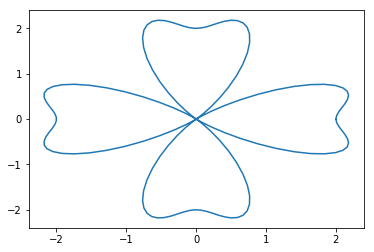

In [4]:
plt.plot(x, y)

### On génère l'animation proprement dite

In [5]:
import matplotlib.animation as animation

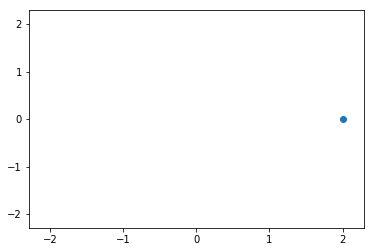

In [6]:
# Création de la figure et de l'axe

fig, ax = plt.subplots()

# Création de la ligne qui sera mise à jour au fur et à mesure
line, = ax.plot([],[], color='blue')
point, = ax.plot([], [], ls="none", marker="o")

#Gestion des limites de la fenêtre
ax.set_xlim([1.05*np.min(x), 1.05*np.max(x)])
ax.set_ylim([1.05*np.min(y), 1.05*np.max(y)])


# Création de la function qui sera appelée à "chaque nouvelle image"
def animate(k):
    i = min(k, x.size)
    line.set_data(x[:i], y[:i])
    point.set_data(x[i], y[i])
    return line, point

# Génération de l'animation, frames précise les arguments numérique reçus par func (ici animate), 
# interval est la durée d'une image en ms, blit gère la mise à jour
ani = animation.FuncAnimation(fig=fig, func=animate, frames=range(x.size), interval=50, blit=True)


In [7]:
# Création du fichier, dpi : résolution, fps : images par secondes

ani.save(filename="courbe.mp4", dpi =80, fps=20)

### Visualisation dans le notebook

In [8]:
%%html

<video width="800" height="400" controls="controls">
  <source src="courbe.mp4" type="video/mp4" />
</video>

### Alternative pour certains navigateurs

In [9]:
from IPython.display import HTML

In [10]:
HTML(ani.to_html5_video())

## Remarque 

En cas d'erreur indiquant que `Ffmpeg` n'est pas disponible pour les distributions Linux récentes. Il faut changer le `writer` par défaut de matplotlib via la ligne suivante.

In [11]:
plt.rcParams["animation.writer"] = "avconv"